In [1]:
import os
from pylab import *
import matplotlib.pyplot as plt
from IPython.core.display import display,HTML
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

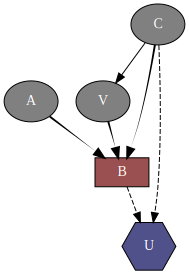

In [45]:
"""
Créer un ID avec des strings
*D = noeud décision
$U = noeud d'utilité
C  = noeud chance
"""
ID1=gum.fastID("A->*B<-C->V->B->$U<-C")
gnb.showInfluenceDiagram(ID1)

In [282]:
"Créer un ID avec des fonctions (sans doute comment on va proceder)"
ID2=gum.fastID("")


#Façon de créer des noeuds LabelizedVariable(aName, aDesc=’’, nbrLabel=2) -> LabelizedVariable
chanceNode=ID2.addChanceNode(gum.LabelizedVariable("nameChance","DescriptionOptionelleChance",3))
UtilityNode=ID2.addUtilityNode(gum.LabelizedVariable("nameUtility","DescriptionOptionelleUtility",1))
DecisionNode=ID2.addDecisionNode(gum.LabelizedVariable("nameDecision","DescriptionOptionelleDecision",2))

#Façon d'ajouter un arc
ID2.addArc(chanceNode,DecisionNode)
ID2.addArc(DecisionNode,ID2.idFromName("nameUtility"))



ID2.cpt(chanceNode)[{'s':0}]=[0.7,0.2,0.1]
ID2.cpt(chanceNode)[{'s':1}]=[0.1,0.8,0.1]

ID2.utility(UtilityNode)[{'nameDecision':0}]=10
ID2.utility(UtilityNode)[{'nameDecision':1}]=5
gnb.sideBySide(ID2,gnb.getInference(ID2))


ID2.variable(ID2.idFromName("nameDecision")).domain()

"G <!-- nameChance --> nameChance nameChance <!-- nameDecision --> nameDecision nameDecision <!-- nameChance->nameDecision --> nameChance->nameDecision <polygon fill=""black"" stroke=""transparent"" stroke-width=""2"" stroke-dasharray=""1,5"" points=""66.32,-148.27 66.27,-147.07 66.22,-145.84 66.18,-144.6 66.13,-143.35 66.08,-142.08 66.03,-140.8 65.98,-139.51 65.93,-138.21 65.88,-136.91 65.83,-135.6 65.77,-134.29 65.72,-132.97 65.67,-131.66 65.62,-130.35 65.57,-129.05 65.52,-127.75 65.47,-126.45 65.42,-125.17 65.37,-123.9 65.32,-122.63 65.32,-122.63 65.27,-123.9 65.22,-125.17 65.17,-126.45 65.12,-127.75 65.07,-129.05 65.02,-130.35 64.97,-131.66 64.92,-132.97 64.87,-134.29 64.81,-135.6 64.76,-136.91 64.71,-138.21 64.66,-139.51 64.61,-140.8 64.56,-142.08 64.51,-143.35 64.46,-144.6 64.41,-145.84 64.37,-147.07 64.32,-148.27 66.32,-148.27""/> <!-- nameUtility --> nameUtility nameUtility <!-- nameDecision->nameUtility --> nameDecision->nameUtility"


'<0,1>'

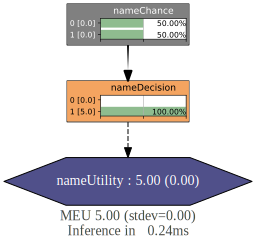

In [69]:
#Forcer une décision
gnb.showInference(ID2,evs={'nameDecision':'1'})

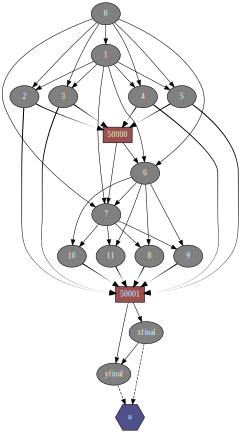

In [281]:
import numpy as np
def createIDRobot(n,xInitial,yInitial):
    ID=gum.fastID("")
    chances=np.zeros((n,6))
    decision=np.zeros(n)
    """
    chances contient tous les identifiants des noeuds chance de l'ID, par convention, si l'ID est égal à
    0 mod(6) --> le noeud est un x
    1 mod(6) --> le noeud est un y
    2 mod(6) --> le noeud est un n
    3 mod(6) --> le noeud est un e
    4 mod(6) --> le noeud est un s
    5 mod(6) --> le noeud est un w

    decision contient tous les identifiants des noeuds décisions de l'ID, par convention, si l'ID est égal à 
    6*n+i pour tout i appartenant à 0,...,n-1, le noeud est le noeud décision de la ième étape.
    """
    for i in range(n):
        #Création des noeuds chance
        temp=chances[i]
        #ajouter x

        temp[0]=int(ID.addChanceNode(gum.LabelizedVariable(str(6*i),str(i),9),6*i))
        #ajouter y
        temp[1]=int(ID.addChanceNode(gum.LabelizedVariable(str(6*i+1),str(i+1),7),6*i+1))
        for k in range(4):
            temp[k+2]=ID.addChanceNode(gum.LabelizedVariable(str(6*i+2+k),str(6*i+2+k),2),6*i+2+k)
        #Création du noeud de décision
        decision[i]=int(ID.addDecisionNode(gum.LabelizedVariable(str(i+50000),str(i+50000),4),i+50000))
        
        
        #Creation des arcs entre x,y et les capteurs de l'étape courante
        x=int(temp[0])
        y=int(temp[1])
        ns=int(temp[2])
        es=int(temp[3])
        ss=int(temp[4])
        ws=int(temp[5])
        
        
        ID.addArc(x,y)
        ID.addArc(x,ns)
        ID.addArc(x,es)
        ID.addArc(x,ss)
        ID.addArc(x,ws)
        ID.addArc(y,ns)
        ID.addArc(y,es)
        ID.addArc(y,ss)
        ID.addArc(y,ws)

        #Création des arcs depuis TOUS les noeuds chances des capteurs vers le noeud de décision courant
        #de l'étape
        for l in range(i+1):
            ID.addArc(int(chances[(l)][2]),int(decision[i]))
            ID.addArc(int(chances[(l)][3]),int(decision[i]))
            ID.addArc(int(chances[(l)][4]),int(decision[i]))
            ID.addArc(int(chances[(l)][5]),int(decision[i]))
        #Création des arcs depuis x_i-1 vers x_i et de y_i-1 vers y_i (seulement à partir de la deuxième étape)
        if(i>0):
            ID.addArc(int(tempavant[0]),int(y))
            ID.addArc(int(tempavant[0]),int(x))
            ID.addArc(int(tempavant[1]),int(y))
            ID.addArc(int(tempavant[1]),int(x))

            #Création des arcs entre le noeud de décision de la i-1 ème étape vers x_i et y_i
            ID.addArc(int(decision[i-1]),x)
            ID.addArc(int(decision[i-1]),y)

        tempavant=temp
        
        #TODO : Fonction d'utilité, Politiques, Potentiels pour noeuds chance x_i y_i avec i≠0
        if(i==0):
            ID.cpt(x)[xInitial]=1
            ID.cpt(y)[yInitial]=1
        
        for h in range(9):
            for j in range(7):
                ID.cpt(ns)[{str(x):h,str(y):j}]=[0,1]
                ID.cpt(es)[{str(x):h,str(y):j}]=[0,1]
                ID.cpt(ss)[{str(x):h,str(y):j}]=[0,1]
                ID.cpt(ws)[{str(x):h,str(y):j}]=[0,1]
        for g in range(2,6):
            ID.cpt(ns)[{str(x):2,str(y):g}]=[1,0]
            ID.cpt(ns)[{str(x):4,str(y):g}]=[1,0]
            ID.cpt(ns)[{str(x):6,str(y):g}]=[1,0]
            
            ID.cpt(es)[{str(x):g,str(y):1}]=[1,0]
            ID.cpt(es)[{str(x):g,str(y):5}]=[1,0]
        
        ID.cpt(es)[{str(x):1,str(y):2}]=[1,0]
        ID.cpt(es)[{str(x):1,str(y):4}]=[1,0]
        ID.cpt(es)[{str(x):6,str(y):2}]=[1,0]
        ID.cpt(es)[{str(x):6,str(y):4}]=[1,0]
        for g in range(1,5):
            ID.cpt(ss)[{str(x):2,str(y):g}]=[1,0]
            ID.cpt(ss)[{str(x):4,str(y):g}]=[1,0]
            ID.cpt(ss)[{str(x):6,str(y):g}]=[1,0]
        for g in range(3,7):
            ID.cpt(ws)[{str(x):g,str(y):2}]=[1,0]
            ID.cpt(ws)[{str(x):g,str(y):5}]=[1,0]
        ID.cpt(ws)[{str(x):2,str(y):2}]=[1,0]
        ID.cpt(ws)[{str(x):2,str(y):4}]=[1,0]
        ID.cpt(ws)[{str(x):7,str(y):2}]=[1,0]
        ID.cpt(ws)[{str(x):7,str(y):4}]=[1,0]


    ID.addArc(int(decision[n-1]),ID.addChanceNode(gum.LabelizedVariable("xfinal","xfinal",9)))
    ID.addArc(int(decision[n-1]),ID.addChanceNode(gum.LabelizedVariable("yfinal","yfinal",7)))
    ID.addArc(int(ID.idFromName("xfinal")),int(ID.idFromName("yfinal")))
    ID.addUtilityNode(gum.LabelizedVariable("u","u",1))
    ID.addArc(int(ID.idFromName("xfinal")),int(ID.idFromName("u")))
    ID.addArc(int(ID.idFromName("yfinal")),int(ID.idFromName("u")))
    return ID

gnb.showInfluenceDiagram(createIDRobot(2,3,2))